In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

# Acquire

In [3]:
#ante_natal_care_df = pd.read_csv("csv/HealthData-Nilgiris-AnteNatal-2014-2015.csv")
family_planning_df = pd.read_csv("csv/HealthData-Nilgiris-FamilyPlanning-2014-2015.csv")
family_planning_ch_df = pd.read_csv("csv/HealthData-Chennai-FamilyPlanning-2014-2015.csv")

In [4]:
family_planning_df.columns

Index([u'Parameters', u'Type', u'Total Facility', u'April 13-14',
       u'April 14-15', u'Difference-April 14-15-April 13-14',
       u'Total Reported Facility', u'May 13-14', u'May 14-15',
       u'Difference-May 14-15-May 13-14', u'Total Reported Facility.1',
       u'June 13-14', u'June 14-15', u'Difference-June 14-15-June 13-14',
       u'Total Reported Facility.2', u'July 13-14', u'July 14-15',
       u'Difference-July 14-15-July 13-14', u'Total Reported Facility.3',
       u'August 13-14', u'August 14-15',
       u'Difference-August 14-15-August 13-14', u'Total Reported Facility.4',
       u'September 13-14', u'September 14-15',
       u'Difference-September 14-15-September 13-14',
       u'Total Reported Facility.5', u'October 13-14', u'October 14-15',
       u'Difference-October 14-15-October 13-14', u'Total Reported Facility.6',
       u'November 13-14', u'November 14-15',
       u'Difference-November 14-15-November 13-14',
       u'Total Reported Facility.7', u'December 13-1

# Refine

In [5]:
family_planning_subset_df = family_planning_df.select(lambda col: not col.startswith('Total') and not col.startswith('Difference') \
                          and not col.startswith('Type'),axis=1 )
family_planning_ch_subset_df = family_planning_ch_df.select(lambda col: not col.startswith('Total') and not col.startswith('Difference') \
                          and not col.startswith('Type'),axis=1 )

In [6]:
months = {'January':'Jan',
          'February':'Feb',
          'March':'Mar',
          'April':'Apr',
          'May':'May',
          'June':'Jun',
          'July':'Jul',
          'August':'Aug',
          'September':'Sep',
          'October':'Oct',
          'November':'Nov',
          'December':'Dec'}


In [7]:
def get_date_from_column_name(name):
    month_present = name.split(" ")
    year = month_present[1].split("-")
    date_string = months[month_present[0]]+" "+year[0]
    return datetime.strptime(date_string,"%b %y")

In [8]:
def from_datetime_get_month_and_year(date):

    return str(date.month)+"-"+str(date.year)

In [9]:
def sort_df_on_time(df):
    columns = {}

    for name in (df.keys()[1:]):
        columns[get_date_from_column_name(name)] = name
    
    dates = columns.keys()
    dates.sort()
    
    new_df = pd.DataFrame()
    new_df[df.columns[0]] = df[df.columns[0]]
    for date in dates:
        column_name = columns[date]
        new_df[from_datetime_get_month_and_year(date)] = df[column_name]
    
    return new_df   

In [10]:
sorted_nl_df = sort_df_on_time(family_planning_subset_df)
sorted_nl_df = sorted_nl_df.fillna(axis=1,method='backfill')
sorted_ch_df = sort_df_on_time(family_planning_ch_subset_df)
sorted_ch_df = sorted_ch_df.fillna(axis=1,method='backfill')


# Explore

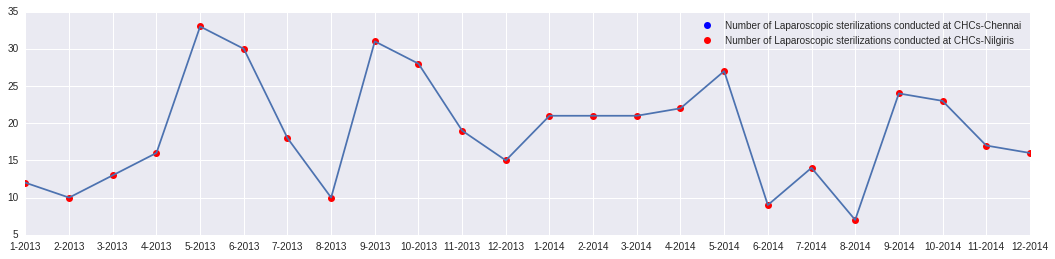

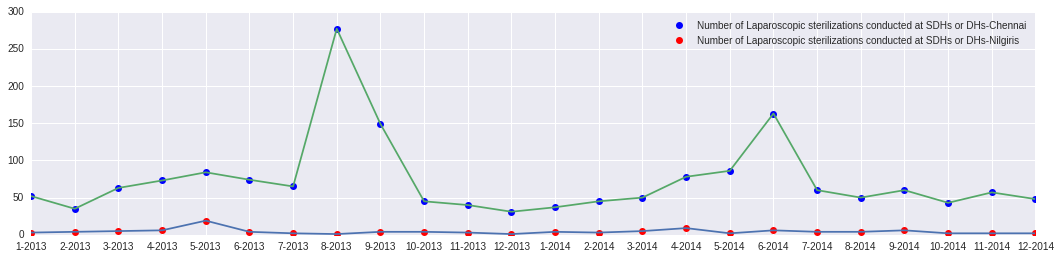

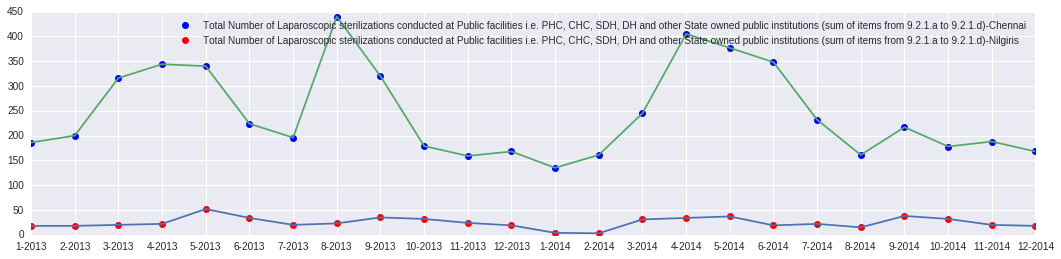

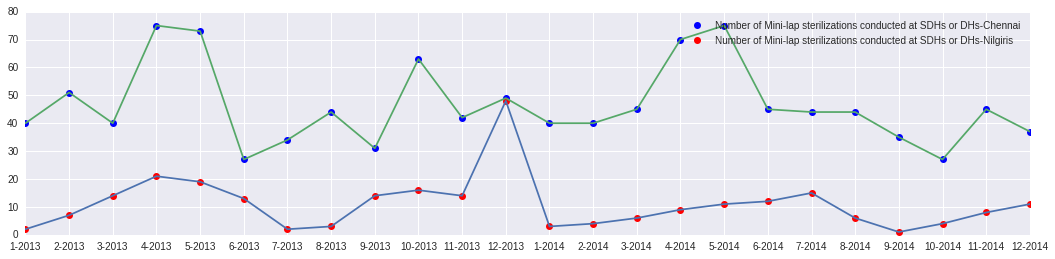

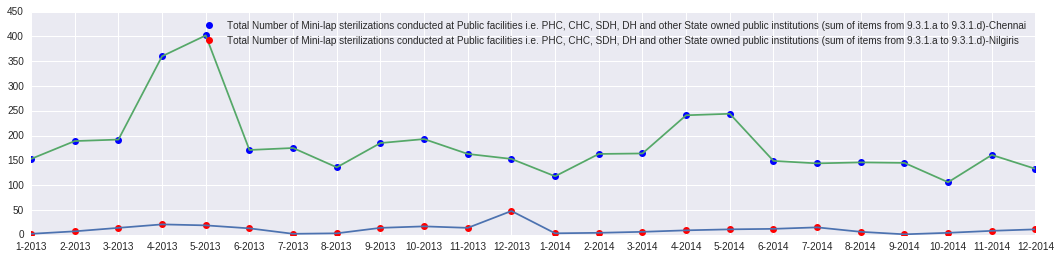

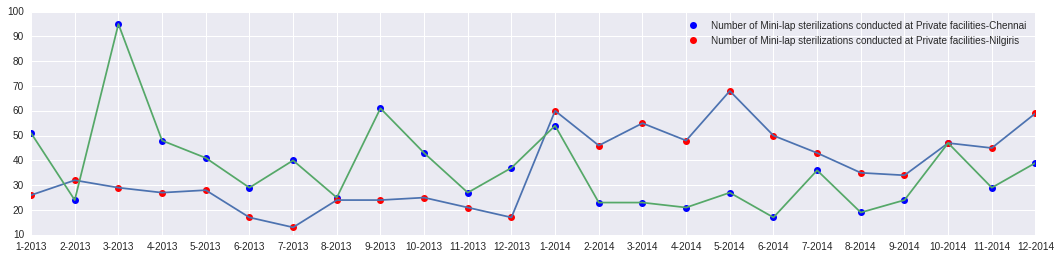

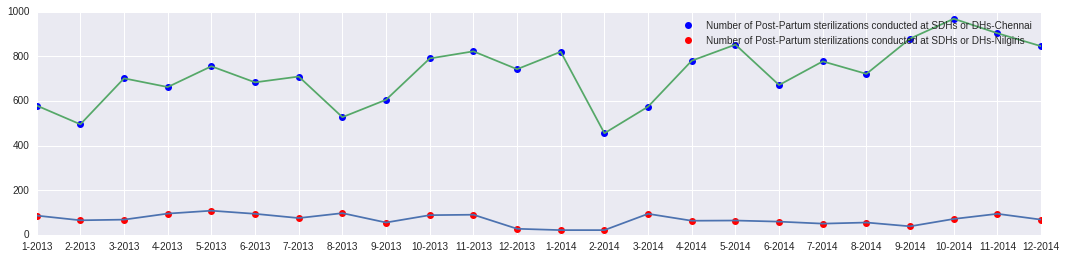

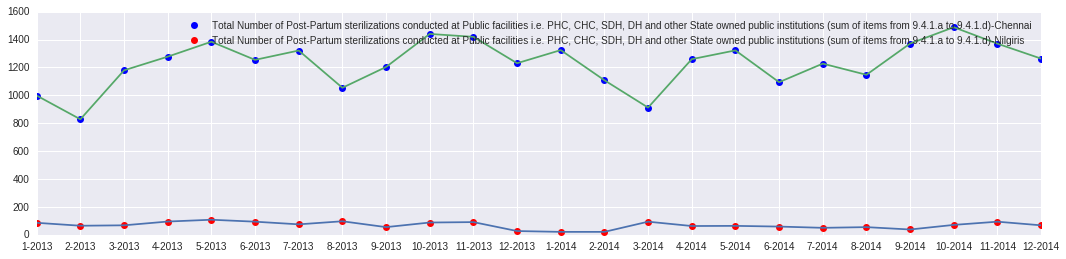

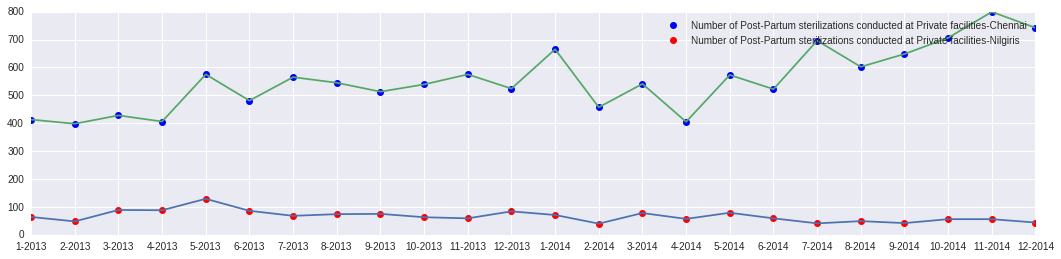

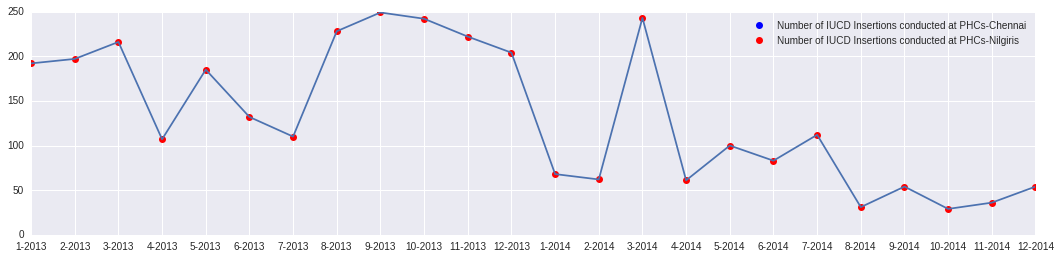

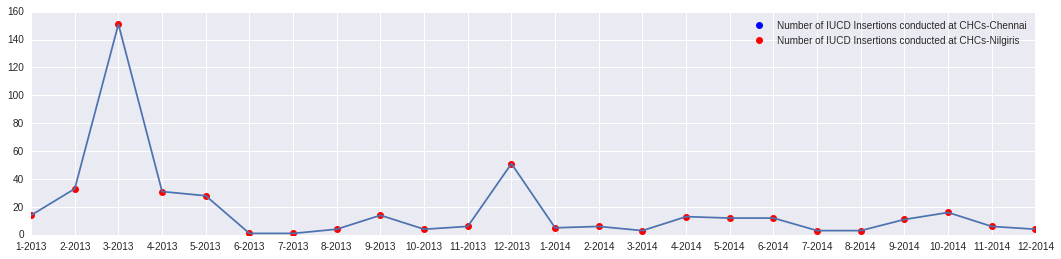

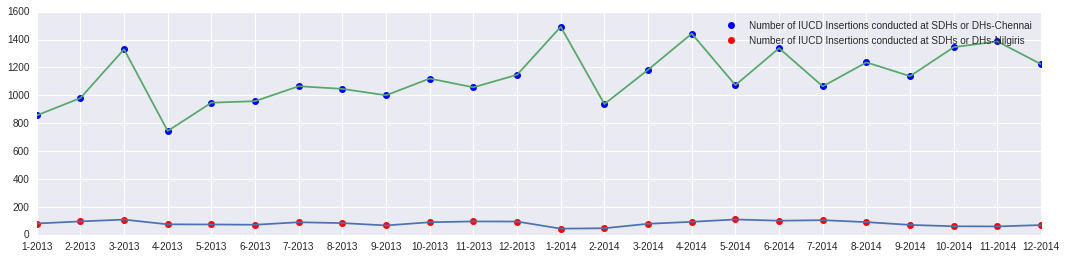

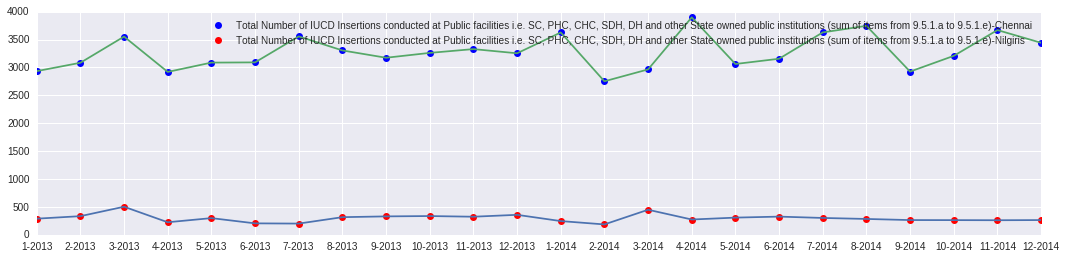

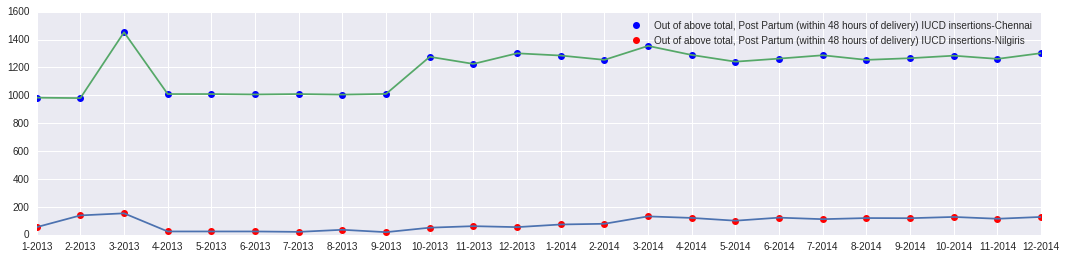

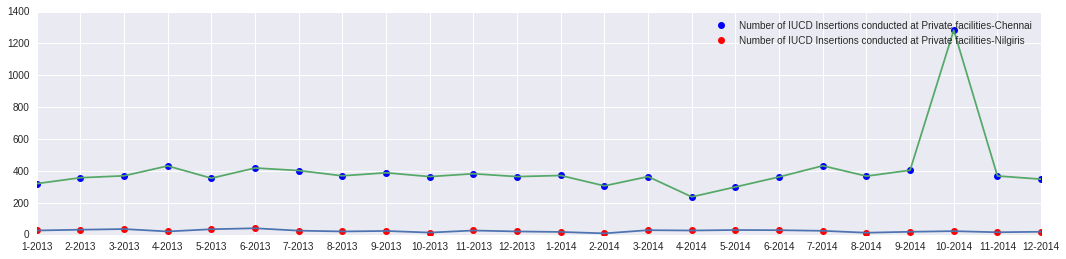

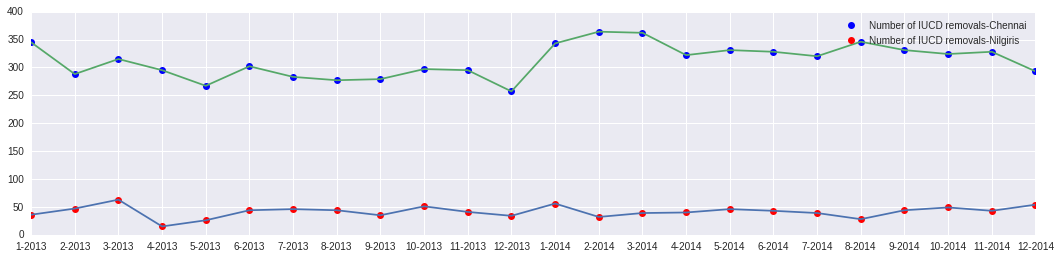

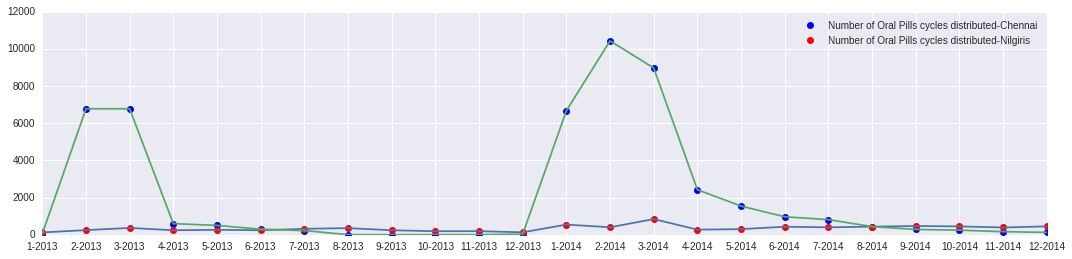

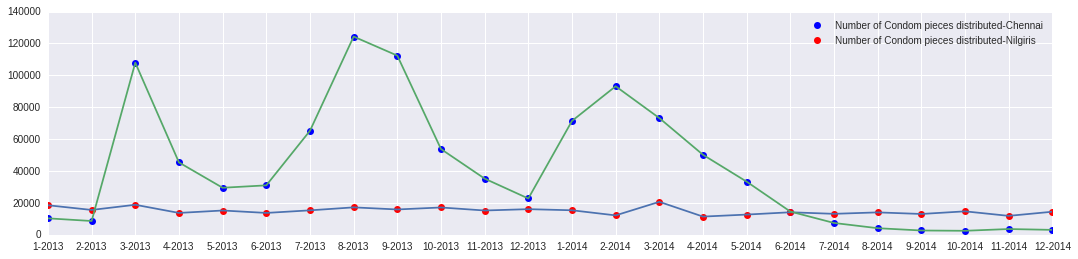

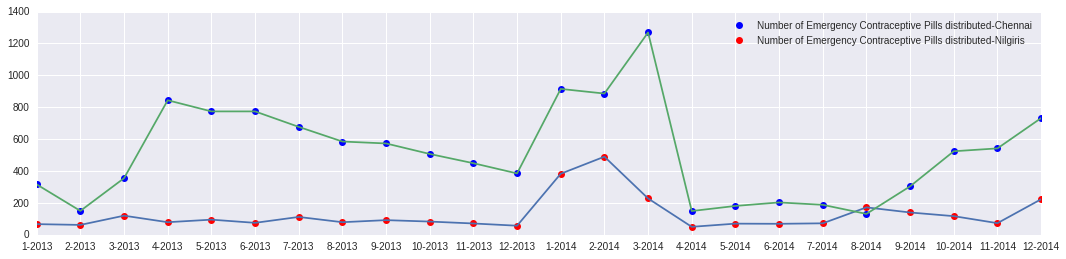

In [11]:

#for k,v in sorted_ch_df.iterrows() and m,n in sorted_df.iterrows():
for i in range(0,sorted_ch_df.shape[0]):
    v = sorted_ch_df.iloc[i]
    n = sorted_nl_df.iloc[i]
    plt.figure(figsize=(18,4))
    plt.xticks(range(0,(len(sorted_ch_df.columns)-1)),v.index[1:])
    plt.plot(v.values[1:],'bo')
    plt.plot(n.values[1:],'ro')
    plt.plot(n.values[1:])
    plt.plot(v.values[1:])
    plt.legend([v.values[0]+"-Chennai",n.values[0]+"-Nilgiris"])

# Model

In [12]:
model = LinearRegression()
X = np.array(range(0,18))
y = sorted_nl_df.iloc[0,1:19]

X = X.reshape(-1,1)
y = y.reshape(-1,1)

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
test = np.array(range(len(X),24))
test = test.reshape(-1,1)

In [14]:
predicted_output = model.predict(test)

# Insights

In [15]:
model_df = pd.DataFrame([sorted_nl_df.iloc[0,20:].values,predicted_output.flatten()])

In [16]:
model_df_transposed = model_df.T
model_df_transposed.head()
model_df_transposed = model_df_transposed.rename(columns={0:'Actual',1:'Predicted'})

In [17]:
model_df_transposed.head()

,Actual,Predicted
0,7,21.875817
1,24,22.096663
2,23,22.317509
3,17,22.538356
4,16,22.759202


In [18]:
for i in range(0,sorted_ch_df.shape[0]):
    
    v = sorted_ch_df.iloc[i]
    n = sorted_nl_df.iloc[i]
              
    correlation = stats.pearsonr(v.values[1:],n.values[1:])
   
    print v.values[0],correlation[0],correlation[1]

Number of Laparoscopic sterilizations conducted at CHCs nan 1.0
Number of Laparoscopic sterilizations conducted at SDHs or DHs 0.00760559180344 0.971863685407
Total Number of Laparoscopic sterilizations conducted at Public facilities i.e. PHC, CHC, SDH, DH and other State owned public institutions (sum of items from 9.2.1.a to 9.2.1.d) 0.463122927716 0.022662327562
Number of Mini-lap sterilizations conducted at SDHs or DHs 0.323432276366 0.123151627356
Total Number of Mini-lap sterilizations conducted at Public facilities i.e. PHC, CHC, SDH, DH and other State owned public institutions (sum of items from 9.3.1.a to 9.3.1.d) 0.304595435827 0.147841386212
Number of Mini-lap sterilizations conducted at Private facilities -0.208291893444 0.328711399655
Number of Post-Partum sterilizations conducted at SDHs or DHs -0.0155353489904 0.942563277767
Total Number of Post-Partum sterilizations conducted at Public facilities i.e. PHC, CHC, SDH, DH and other State owned public institutions (sum of 